In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.info

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3          

In [7]:
df.describe

<bound method NDFrame.describe of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3        

In [9]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [10]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [11]:
df['transmission'] = df['transmission'].map({'Automatic':0,'Manual':1,'Semi-Auto':2})
df['fuelType'] = df['fuelType'].map({'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':4})


In [12]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,0,150,57.7,1.0
1,Focus,2018,14000,1,9083,0,150,57.7,1.0
2,Focus,2017,13000,1,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,0,1482,0,145,48.7,1.0
5,Fiesta,2015,10500,1,35432,0,145,47.9,1.6
6,Puma,2019,22500,1,2029,0,145,50.4,1.0
7,Fiesta,2017,9000,1,13054,0,145,54.3,1.2
8,Kuga,2019,25500,0,6894,1,145,42.2,2.0
9,Focus,2018,10000,1,48141,0,145,61.4,1.0


In [13]:
df['mpg'] = df['mpg'].astype(int)
df['engineSize'] = df['engineSize'].astype(int)

In [14]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,0,150,57,1
1,Focus,2018,14000,1,9083,0,150,57,1
2,Focus,2017,13000,1,12456,0,150,57,1
3,Fiesta,2019,17500,1,10460,0,145,40,1
4,Fiesta,2019,16500,0,1482,0,145,48,1
5,Fiesta,2015,10500,1,35432,0,145,47,1
6,Puma,2019,22500,1,2029,0,145,50,1
7,Fiesta,2017,9000,1,13054,0,145,54,1
8,Kuga,2019,25500,0,6894,1,145,42,2
9,Focus,2018,10000,1,48141,0,145,61,1


In [15]:
X = df.drop(['model','price'],axis=1).values
Y = df['price']

In [16]:
X

array([[ 2017,     0, 15944, ...,   150,    57,     1],
       [ 2018,     1,  9083, ...,   150,    57,     1],
       [ 2017,     1, 12456, ...,   150,    57,     1],
       ...,
       [ 2015,     1,  7010, ...,    20,    67,     1],
       [ 2018,     1,  5007, ...,   145,    57,     1],
       [ 2015,     1,  5007, ...,    22,    57,     1]])

In [18]:
Y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
X_train

array([[ 2015,     1, 58199, ...,    30,    64,     1],
       [ 2011,     1, 73780, ...,   200,    40,     1],
       [ 2016,     1, 17050, ...,   125,    54,     1],
       ...,
       [ 2018,     1, 15654, ...,   145,    74,     1],
       [ 2017,     2, 26663, ...,   145,    54,     2],
       [ 2017,     1, 11186, ...,     0,    65,     1]])

In [21]:
Y_train

16054     9499
17266     5485
15479     8600
1575     17989
14613     8105
         ...  
11284    14899
11964    18495
5390     11950
860      15998
15795     9700
Name: price, Length: 14372, dtype: int64

# LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [23]:
linear_model = LinearRegression()

In [25]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
predictions = linear_model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2 = r2_score(Y_test,predictions)
mse = mean_squared_error(Y_test,predictions)
mae = mean_absolute_error(Y_test,predictions)

In [28]:
r2

0.7508225187052637

In [29]:
mse

5584578.588253979

In [30]:
mae

1721.513552893086

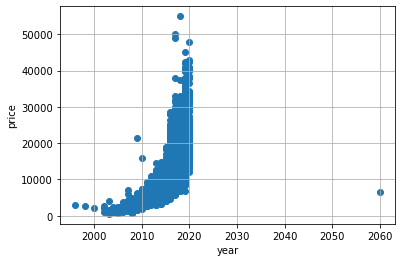

In [32]:
X = df['year']
Y = df['price']
plt.xlabel('year')
plt.ylabel('price')
plt.scatter(X,Y)
plt.grid()
plt.show()

# LOGISTIC REGRESSION

In [41]:
X = df.drop(['model','price'],axis=1).values
x = X.reshape(1,-1)
Y = df['price']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [43]:
X_train

array([[ 2018,     1,  3482, ...,   145,    57,     1],
       [ 2017,     1, 23901, ...,    20,    68,     1],
       [ 2018,     0,  9534, ...,   145,    48,     1],
       ...,
       [ 2018,     1, 15654, ...,   145,    74,     1],
       [ 2017,     2, 26663, ...,   145,    54,     2],
       [ 2017,     1, 11186, ...,     0,    65,     1]])

In [44]:
Y_train

1457      8491
5815      9691
14160    14525
11351    14499
10618    13970
         ...  
11284    14899
11964    18495
5390     11950
860      15998
15795     9700
Name: price, Length: 12576, dtype: int64

In [45]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train,Y_train)

/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred = log_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
score = accuracy_score(pred,Y_test)
print(score)

0.012987012987012988


In [52]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

         495       0.00      0.00      0.00         0
         694       0.00      0.00      0.00         0
         999       0.00      0.00      0.00         0
        1295       0.00      0.00      0.00         0
        1449       0.00      0.00      0.00         0
        1475       0.00      0.00      0.00         0
        1500       0.00      0.00      0.00         0
        1595       0.00      0.00      0.00         0
        1795       0.00      0.00      0.00         0
        1799       0.00      0.00      0.00         0
        1850       0.00      0.00      0.00         0
        1995       0.00      0.00      0.00         0
        1999       0.00      0.00      0.00         0
        2175       0.00      0.00      0.00         0
        2195       0.00      0.00      0.00         0
        2295       0.00      0.00      0.00         0
        2400       0.00      0.00      0.00         0
        2491       0.00    

/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_